<a href="https://colab.research.google.com/github/Nerobite/libraries_for_DA/blob/main/Function_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

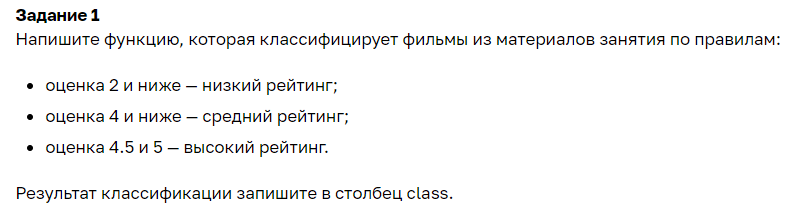

In [ ]:
#Заданиче №1
df = pd.read_csv("ratings.csv")
df.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
def movie_class(param):
  if param <= 2:
    return 'low'
  elif param <= 4:
    return 'middle'
  else:
    return 'high'

In [ ]:
df['class'] = df['rating'].apply(movie_class)
df.head(25)

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,middle
1,1,1029,3.0,1260759179,middle
2,1,1061,3.0,1260759182,middle
3,1,1129,2.0,1260759185,low
4,1,1172,4.0,1260759205,middle
5,1,1263,2.0,1260759151,low
6,1,1287,2.0,1260759187,low
7,1,1293,2.0,1260759148,low
8,1,1339,3.5,1260759125,middle
9,1,1343,2.0,1260759131,low


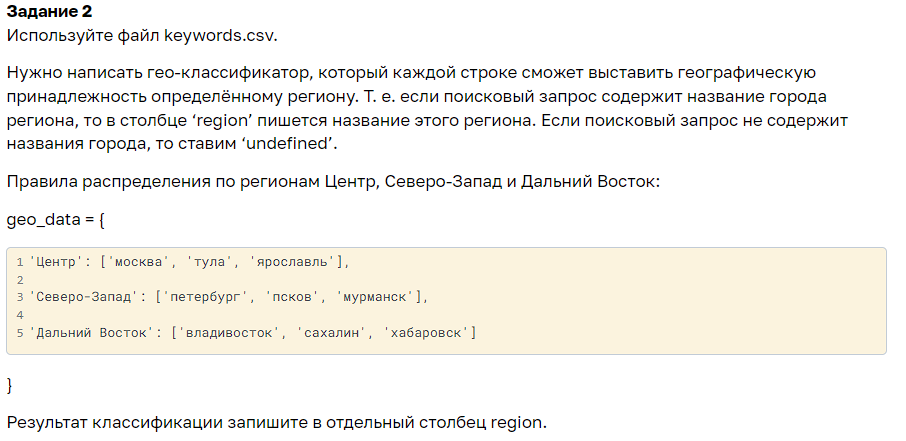

In [ ]:
#Задание №2
df = pd.read_csv("keywords.csv")
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

df.head(10)

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195
5,одноклассники моя страница,19976138
6,майл,15144673
7,авито,14786593
8,переводчик,14453469
9,яндекс,13344734


In [ ]:
city = []
for values in geo_data.values():
  for i in values:
    city.append(i)
city = set(city)
city

{'владивосток',
 'москва',
 'мурманск',
 'петербург',
 'псков',
 'сахалин',
 'тула',
 'хабаровск',
 'ярославль'}

In [ ]:
def region_key(row):
    data=row['keyword'].split(' ')
    for word in data:
        if word in city:
            for key, values in geo_data.items():
                if word in values:
                    return key
    return 'undefined'

In [ ]:
df['region'] = df.apply(region_key, axis = 1)
df.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [ ]:
df[(df['region']!='undefined')]

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток
1236,банк санкт петербург,174375,Северо-Запад
...,...,...,...
99292,афиша кино москва на сегодня,3704,Центр
99590,авито ярославль автомобили с пробегом,3673,Центр
99808,полармед мурманск запись на прием,3719,Северо-Запад
99890,яндекс метро москва,4548,Центр


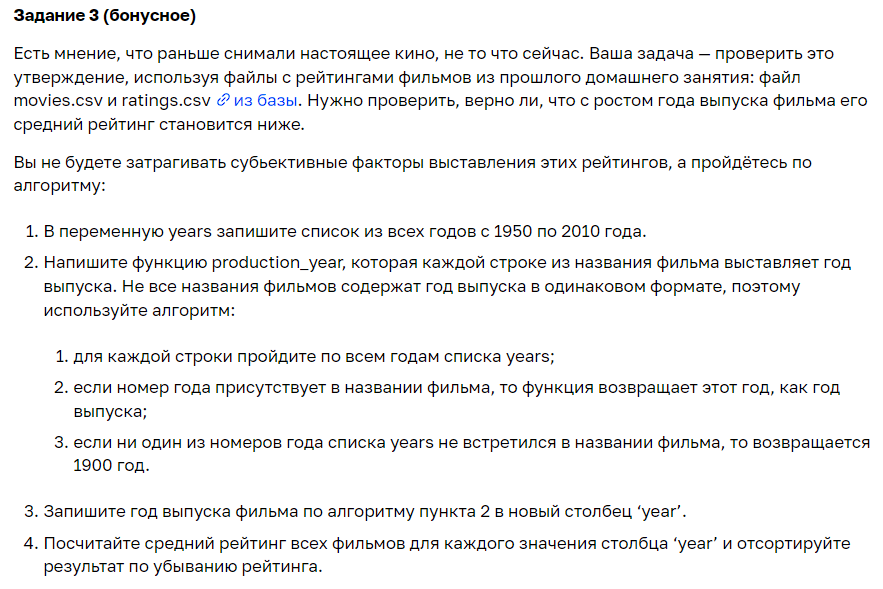

In [ ]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
years = range(1950, 2011)
years = list(map(str,years))

In [ ]:
def production_year(row):
    year_number = row['title']
    for year in years:
      if year in year_number:
        return year
    return '1900'

In [ ]:
movies['year'] = movies.apply(production_year, axis = 1)

In [ ]:
movies[['title', 'year']].head(10)

,title,year
0,Toy Story (1995),1995
1,Jumanji (1995),1995
2,Grumpier Old Men (1995),1995
3,Waiting to Exhale (1995),1995
4,Father of the Bride Part II (1995),1995
5,Heat (1995),1995
6,Sabrina (1995),1995
7,Tom and Huck (1995),1995
8,Sudden Death (1995),1995
9,GoldenEye (1995),1995


In [ ]:
def production_year_new(row):
    title = row['title']
    year_movie = re.search("[0-9]{4}", title)
    if year_movie:
        year_movie = year_movie[0]
        if year_movie in years:
            return year_movie
    return "1900"

In [ ]:
movies['year_new'] = movies.apply(production_year_new, axis = 1)

In [ ]:
movies[['title', 'year', 'year_new']].head()

,title,year,year_new
0,Toy Story (1995),1995,1995
1,Jumanji (1995),1995,1995
2,Grumpier Old Men (1995),1995,1995
3,Waiting to Exhale (1995),1995,1995
4,Father of the Bride Part II (1995),1995,1995


In [ ]:
movies['year'] == movies['year_new']

0       True
1       True
2       True
3       True
4       True
        ... 
9120    True
9121    True
9122    True
9123    True
9124    True
Length: 9125, dtype: bool

In [ ]:
ratings_df = movies.merge(ratings, on = 'movieId')

In [ ]:
ratings_df.head()

,movieId,title,genres,year,year_new,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1995,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1995,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1995,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1995,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1995,19,3.0,855190091


In [ ]:
avg_rating = ratings_df.groupby('year').mean('rating')

In [ ]:
avg_rating['rating'].sort_values()

year
2000    3.356104
1997    3.415764
1996    3.426600
2003    3.444777
2005    3.448434
          ...   
1951    3.983539
1954    3.994220
1952    4.000000
1972    4.011136
1957    4.014241
Name: rating, Length: 62, dtype: float64